In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def newton(f,df,x0,tol=1e-10):
    xn = x0
    p = np.linalg.solve(df(xn),f(xn))
    while np.linalg.norm(p) > tol:
        xn -= p
        print(np.linalg.norm(p))
        p = np.linalg.solve(df(xn),f(xn))
    xn -= p
    return xn

### Solve
$$
\begin{align}
    16x^4+16y^4+z^4 &= 16\cr
    x^2+y^2+z^2&=3\cr
    x^3-y &= 0\cr
\end{align}
$$

In [5]:
def f(x_vec):
    x,y,z = x_vec
    return np.array([
        16*x**4 + 16*y**4 + z**4 - 16,
        x**2 + y**2 + z**2 - 3,
        x**3 - y
    ])
def df(x_vec):
    x,y,z = x_vec
    return np.array([[64*x**3, 64*y**3, 4*z**3],
                    [2*x ,2*y, 2*z],
                    [3*x**2, -1, 0]])

In [6]:
x0 = np.array([1.,1.,1.])
newton(f,df,x0)

0.3611805488794889
0.10989718161721007
0.020696294061051782
0.0005736362942126308
4.5239184554373185e-07


array([0.87796576, 0.67675697, 1.33085541])

In [7]:
f(_)

array([0., 0., 0.])

In [8]:
help(np.vander)

Help on function vander in module numpy:

vander(x, N=None, increasing=False)
    Generate a Vandermonde matrix.
    
    The columns of the output matrix are powers of the input vector. The
    order of the powers is determined by the `increasing` boolean argument.
    Specifically, when `increasing` is False, the `i`-th output column is
    the input vector raised element-wise to the power of ``N - i - 1``. Such
    a matrix with a geometric progression in each row is named for Alexandre-
    Theophile Vandermonde.
    
    Parameters
    ----------
    x : array_like
        1-D input array.
    N : int, optional
        Number of columns in the output.  If `N` is not specified, a square
        array is returned (``N = len(x)``).
    increasing : bool, optional
        Order of the powers of the columns.  If True, the powers increase
        from left to right, if False (the default) they are reversed.
    
        .. versionadded:: 1.9.0
    
    Returns
    -------
    out : ndar

In [9]:
np.vander([1,2,3,4])

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

In [10]:
x = [1,2,3,4]
y = [1,7,0,-2]
A = np.vander(x)
c = np.linalg.solve(A,y)
c

array([  3. , -24.5,  58.5, -36. ])

In [18]:
def horner(x,c):
    y = c[0]
    for ck in c[1:]:
        y = y * x + ck
    return y

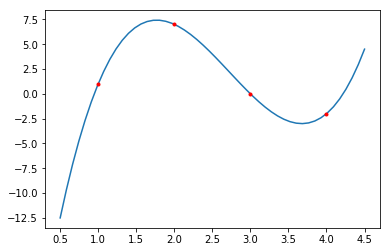

In [20]:
t = np.linspace(0.5,4.5)
plt.plot(t,horner(t,c),x,y,'r.')

In [54]:
n = 25
x = np.random.rand(n)
#y = np.random.randn(n)
y = np.exp(x)*np.sin(10*x)
A = np.vander(x)
c = np.linalg.solve(A,y)

(-3, 3)

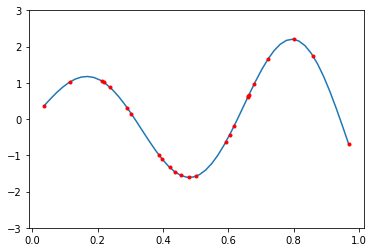

In [55]:
t = np.linspace(min(x),max(x))
plt.plot(t,horner(t,c),x,y,'r.')
plt.ylim([-3,3])


In [56]:
np.linalg.cond(A)

4.987565077463697e+18

In [57]:
c

array([-3.39697534e+03,  3.03568752e+04, -1.25847559e+05,  3.22186136e+05,
       -5.74324962e+05,  7.68420354e+05, -8.24720972e+05,  7.62987577e+05,
       -6.48692252e+05,  5.16749835e+05, -3.74407935e+05,  2.37882387e+05,
       -1.27954069e+05,  5.36260989e+04, -1.69435701e+04,  7.29630317e+03,
       -3.08506827e+03, -1.35657452e+03,  7.76464452e+02,  7.53274739e+02,
       -1.65190423e+02, -1.61659366e+02,  9.99993329e+00,  9.99999466e+00,
        1.35126212e-07])